Nama Mahasiswa    : Nicholaus Verdhy Putranto

Asal Universitas  : Universitas Dian Nuswwantoro Semarang

Kode Peserta      : PYTN - KS11 - 023

# Import Library

Disini Kita membutuhkan beberapa library, diantaranya numpy , pandas, matplotlib, dan matplotlib.pyplot

## Kegunaan Dari Library Untuk Visualisasi Assigment 1
>1. Numpy : Menghasilkan array data n-dimensi dari berbagai format data untuk memproses data, menyiapkan data, memanipulasi data dan untuk memberikan nilai kedalam grafik


>2. Pandas : Digunakan untuk membersihkan data dan formating data, memgfilter data, memanggil data csv atau sejenisanya yang nantinya bisa kita gunakan untuk membuat grafik


>3. Matplotlib : Digunakan untuk membuat plot, meneyesuaikan plot, membuat subplot, menyimpan plot, dan membuat visualisasi yang kompleks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
import folium

# Data Understanding

> Untuk mengawalinya, kita lakukan yang namanya Data Understanding. Data Understanding adalah tahap awal dalam proses analisis data yang melibatkan memahami dan menggali informasi dari data yang diperoleh.

## Data Collection 

> Kita menggunakan data berjudul london Crime DAta 2008-2016 yang terdapat pada kaggle

> Sumber data :  https://www.kaggle.com/datasets/jboysen/london-crime

> Kita panggil data lsoa_crime_by_lsoa.csv dengan fungsi pustaka pandas yaitu pd.read_csv

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
1048570,E01001649,Greenwich,Theft and Handling,Other Theft,3,2010,11
1048571,E01000464,Bexley,Criminal Damage,Criminal Damage To Dwelling,0,2012,3
1048572,E01000064,Barking and Dagenham,Drugs,Possession Of Drugs,1,2010,2
1048573,E01004615,Wandsworth,Criminal Damage,Other Criminal Damage,1,2016,7


## Data Exploration

> melakukan eksplorasi data, yang meliputi memeriksa jumlah data, tipe data, dan statistika

### Melihat jumlah data yang ada 

> Mari kita lihat data frame yang sudah kita buat dan kita lihat ukurannya datanya dengan menggunakan .shape

In [3]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
1048570,E01001649,Greenwich,Theft and Handling,Other Theft,3,2010,11
1048571,E01000464,Bexley,Criminal Damage,Criminal Damage To Dwelling,0,2012,3
1048572,E01000064,Barking and Dagenham,Drugs,Possession Of Drugs,1,2010,2
1048573,E01004615,Wandsworth,Criminal Damage,Other Criminal Damage,1,2016,7


In [4]:
df.shape

(1048575, 7)

> Data diatas memiliki ukuran (1.048.575 baris, 7 kolom)

> Penjelasan Menegai Kolom data diatas :
> - lsoa_code           : mewakili area kepolisian
> - borough             : borough london yang terkait dengan statistik
> - major_category      : kategori kejahatan besar
> - minor_category      : kategori kejahatan ringan
> - value               : hitungan kejahatan untuk wilayah tertentu, pada bulan tertentu
> - year                : tahun ringkasan statistik
>- month               : bulan statistik ringkasan

### Melihat tipe data

> Untuk mengenali data kita lebih lanjut, kita gunakan .info() untuk melihat tipe datanya

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   lsoa_code       1048575 non-null  object
 1   borough         1048575 non-null  object
 2   major_category  1048575 non-null  object
 3   minor_category  1048575 non-null  object
 4   value           1048575 non-null  int64 
 5   year            1048575 non-null  int64 
 6   month           1048575 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 56.0+ MB


> Dari data diatas, terdiri dari 2 tipe data. Yaitu Object dan int64

> Object itu string, dan int64 numerik.

> object : lsoa_code, borough, major_category, minor_category

> int64  : value, year, month

### Melihat beberapa data 

> Dikarenakan jumlah datanya sangatlah banyak barisnya, mari kita panggil dengan fungsi head(), dan tail () untuk melihat 5 data teratas dan 5 data terbawah

In [6]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [7]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
1048570,E01001649,Greenwich,Theft and Handling,Other Theft,3,2010,11
1048571,E01000464,Bexley,Criminal Damage,Criminal Damage To Dwelling,0,2012,3
1048572,E01000064,Barking and Dagenham,Drugs,Possession Of Drugs,1,2010,2
1048573,E01004615,Wandsworth,Criminal Damage,Other Criminal Damage,1,2016,7
1048574,E01001752,Hackney,Other Notifiable Offences,Other Notifiable,0,2008,12


### Melihat Statistika 

> Mari kita lihat ringkasan dan deskripsi tentang data yang kita punya

In [8]:
df.describe()

,value,year,month
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.753327e-01,2.011996e+03,6.500728e+00
std,1.678109e+00,2.580506e+00,3.450317e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.000000e+00
50%,0.000000e+00,2.012000e+03,7.000000e+00
75%,1.000000e+00,2.014000e+03,9.000000e+00
max,2.410000e+02,2.016000e+03,1.200000e+01


> Dari data diatas, hanya tipe data int saja yang diproses

> Kita bisa melihat nilai tengah, standart deviasi, nilai min, 25%, 50%, 75, dan nilai max pada data yang ada di setiap kolomnya



# Data Cleansing

## Pengecekan MIssing Value

> Setelah melakukan pemahaman data diatas, mari kita melakukan pengecekan Missing value pada data diatas.

> Karena jumlah data yang sangatlah banyak, kita gunakan isna() untuk melakukan  penghitungan missing value, dan sum() untuk melakukan penghitungan missing value setiap kolomnya

> Dampak dari missing value bisa membuat plot yang kita buat tidak lengkap, kelsahan interpretasi yang mengakibatkan salah mengambil kesimpulan

In [9]:
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

> Dari data kolom yang diatas, bisa kita lihat data data tersebut tidak mengandung missing value sama sekali. 

## Pengecekan data yang duplikat

> Setelah pengecekan missing value, kita melkukan pengecekan pada data yang dobel/ terduplikat.

> Dampak dari duplikat data pun sama seperti missing value

> kita gunakan duplicate() untuk megecek duplikasi data, dan .sum() untuk jumlah data yang ada duplikatnya

In [10]:
df.duplicated().sum()

0

> Tidak ada data yang dpulikat

> Setelah selesai, data sudah siap untuk dipreprosesing

# PreProcessing Data 

> Untuk tahap ini mari kita lihat, mana kolom yang kita butuh kan dan tidak. 

In [11]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
1048570,E01001649,Greenwich,Theft and Handling,Other Theft,3,2010,11
1048571,E01000464,Bexley,Criminal Damage,Criminal Damage To Dwelling,0,2012,3
1048572,E01000064,Barking and Dagenham,Drugs,Possession Of Drugs,1,2010,2
1048573,E01004615,Wandsworth,Criminal Damage,Other Criminal Damage,1,2016,7


> Sepertinya kita tidak membutuhkan lso_code untuk visualisasi data kali ini, Mari kita hapus saja

## Menghapus kolom yang tidak dibutuhkan 

> kita gunakan .drop, axis = 1, inplace=True

In [12]:
df.drop(['lsoa_code'], axis=1, inplace=True)

> df.drop(['lsoa_code'], axis=1, inplace=True) 

> .drop digunakan untuk menghapus kolomnya

> axis=1 digunakan untuk menandakan bawah kolom itu akan dihapus

> inplace = True digunakan untuk melakukan perbuhan secara permanen

In [13]:
df

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
1048570,Greenwich,Theft and Handling,Other Theft,3,2010,11
1048571,Bexley,Criminal Damage,Criminal Damage To Dwelling,0,2012,3
1048572,Barking and Dagenham,Drugs,Possession Of Drugs,1,2010,2
1048573,Wandsworth,Criminal Damage,Other Criminal Damage,1,2016,7


## Mengubah nama kolom 

> Karena dirasa ada beberapa nama kolom yang riskan. Mari kita ubah nama borough menjadi area, dan value mennjadi count. Value menjadi count diuah, dikarenakan ada fungsi juga yang menggunakan .value

In [14]:
df.rename(columns={'borough': 'area','value':'counted'}, inplace=True)

In [15]:
df

,area,major_category,minor_category,counted,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
1048570,Greenwich,Theft and Handling,Other Theft,3,2010,11
1048571,Bexley,Criminal Damage,Criminal Damage To Dwelling,0,2012,3
1048572,Barking and Dagenham,Drugs,Possession Of Drugs,1,2010,2
1048573,Wandsworth,Criminal Damage,Other Criminal Damage,1,2016,7


> dirasa data sudah diap, mari kita masuk ke visualisasi

# Data dan Visualisasi

## Hipotesis 

Di penugasan ini, saya akan mengambil "Visualisasi Top 5 *Major Category* di London"

Kasus yang saya angkat adalah :
1. Bagaimana 5  Tingkat kejahat besar setiap tahunnya dari 2008-2016? meningkat atau menurun.

2. Daerah mana sajakah yang mempunyai nilai kriminalitas tertingi pada tahun 2016?

3. Melihat Frekuensi Tingkat kejahatan yang muncul setiap tahunnya

4. Bisa mengambil keputusan untuk tahun 2017, daerah mana dan kategori kejahatan apa yang perlu ditekan 

> Mari kita lihat 5 kejahatan terbesar di London berdasarkan angka kriminalnya dari tahun 2008 hingga 2016

## Mengambil kolom yang diperlukan

In [16]:
df['major_category'].value_counts().head(5)

Theft and Handling             307992
Violence Against the Person    247061
Criminal Damage                159997
Drugs                           92169
Burglary                        81064
Name: major_category, dtype: int64

> Mari Kita lihat jumlah angka kriminal pada major category berdsarakan setiap tahunnya

>  mari kita mengelompokkan data pada kolom major_category dan year pada dataframe df yang memiliki tahun lebih besar dari 2007

> Kita gunakan condioton pada dataframe dan grouyp by untuk dmelakukan pengelompokan data

> Lalu jumlah dari masing masing major kategori kita jumlahkan dengan sum

In [17]:
major_cat = df[(df['year'] > 2007)].groupby(['major_category','year'])['counted'].sum()
major_cat

major_category               year
Burglary                     2008     6892
                             2009     6929
                             2010     6794
                             2011     7392
                             2012     7147
                                     ...  
Violence Against the Person  2012    11953
                             2013    11535
                             2014    14360
                             2015    17688
                             2016    18212
Name: counted, Length: 81, dtype: int64

## Mari kita kelompokan data data tersebut berdasarkan nama dari kategori Major_category 

>Kita gunakan variable tah untuk menampung tahun dan Tehft and handling yang nantinya akan kita gunakan untuk menjadi data frame baru

In [18]:
tah = major_cat['Theft and Handling']
tah

year
2008    21773
2009    21349
2010    21968
2011    23566
2012    26681
2013    23870
2014    20567
2015    22060
2016    22879
Name: counted, dtype: int64

>Kita gunakan variable violence untuk menampung tahun dan Violence Againts the Person yang nantinya akan kita gunakan untuk menjadi data frame baru

In [19]:
violence = major_cat['Violence Against the Person']
violence

year
2008    12216
2009    12492
2010    12040
2011    11139
2012    11953
2013    11535
2014    14360
2015    17688
2016    18212
Name: counted, dtype: int64

>Kita gunakan variable cd untuk menampung tahun dan Criminal damage yang nantinya akan kita gunakan untuk menjadi data frame baru

In [20]:
cd = major_cat['Criminal Damage']
cd

year
2008    7096
2009    6441
2010    5944
2011    5489
2012    4646
2013    4331
2014    4426
2015    4813
2016    4976
Name: counted, dtype: int64

>Kita gunakan variable drg untuk menampung tahun dan drugs yang nantinya akan kita gunakan untuk menjadi data frame baru

In [21]:
drg = major_cat['Drugs']
drg

year
2008    5143
2009    4468
2010    4422
2011    4515
2012    3843
2013    3894
2014    3425
2015    2997
2016    3174
Name: counted, dtype: int64

>Kita gunakan variable blg untuk menampung tahun dan burglary yang nantinya akan kita gunakan untuk menjadi data frame baru

In [22]:
blg = major_cat['Burglary']
blg

year
2008    6892
2009    6929
2010    6794
2011    7392
2012    7147
2013    6912
2014    6006
2015    5475
2016    5207
Name: counted, dtype: int64

## Konvert Jadi DataFrame 

> Setelah data kita kelompokkan berdsarakan major_kategorynya, mari kita ubah kedalam bentuk dataFrame.

> Tak lupa juga kita mengubah *counted* menjadi nama major_category

> 1. Kita gunakan to.frame untuk mengubah data menjadi dataFrame
> 2. Lalu kita rename kolomnya counted menjadi nama dari major_category nya
> 3. gunakan inplce = True untuk melakukan perubahan se4cara permanen
> 4. gunakan juga index.name = None untuk menghapus kolom yang tidak ada nilainya yang diakibatkan konvert dataFrame

In [23]:
dftah = tah.to_frame()
dftah.rename(columns={'counted': 'Theft and Handling'}, inplace=True)
dftah.index.name=None
dftah

,Theft and Handling
2008,21773
2009,21349
2010,21968
2011,23566
2012,26681
2013,23870
2014,20567
2015,22060
2016,22879


In [24]:
dfviolence = violence.to_frame()
dfviolence.rename(columns={'counted': 'Violence Against the Person'}, inplace=True)
dftah.index.name=None
dfviolence

,Violence Against the Person
year,
2008,12216
2009,12492
2010,12040
2011,11139
2012,11953
2013,11535
2014,14360
2015,17688
2016,18212


In [25]:
dfcd = cd.to_frame()
dfcd.rename(columns={'counted': 'Criminal Damage'}, inplace=True)
dftah.index.name=None
dfcd

,Criminal Damage
year,
2008,7096
2009,6441
2010,5944
2011,5489
2012,4646
2013,4331
2014,4426
2015,4813
2016,4976


In [26]:
dfdrg = drg.to_frame()
dfdrg.rename(columns={'counted': 'Drugs'}, inplace=True)
dfdrg.index.name=None
dfdrg

,Drugs
2008,5143
2009,4468
2010,4422
2011,4515
2012,3843
2013,3894
2014,3425
2015,2997
2016,3174


In [27]:
dfblg = blg.to_frame()
dfblg.rename(columns={'counted': 'Burglary'}, inplace=True)
dftah.index.name=None
dfblg

,Burglary
year,
2008,6892
2009,6929
2010,6794
2011,7392
2012,7147
2013,6912
2014,6006
2015,5475
2016,5207


## Menggabungkan DataFrame 

> Setelah kita mengubah semua menjadi dataFrame, mari kita gabungkan lagi menjadi satu data yang akan kita pakai dalam visualisasi nantinya. Kita gunakan concat untuk menyatukan beberapa dataframe, dan axis =1 karena letaknya ada di kolom. Kita beri nama vaeiabalenya df_top5

In [28]:
df_top5 = pd.concat([dftah,dfviolence,dfcd,dfdrg,dfblg], axis=1)
df_top5

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
2008,21773,12216,7096,5143,6892
2009,21349,12492,6441,4468,6929
2010,21968,12040,5944,4422,6794
2011,23566,11139,5489,4515,7392
2012,26681,11953,4646,3843,7147
2013,23870,11535,4331,3894,6912
2014,20567,14360,4426,3425,6006
2015,22060,17688,4813,2997,5475
2016,22879,18212,4976,3174,5207


> Bisa kita lihat sekarang, index atau baris dari data diatas adalah urutan tahun dari 2008 sampai 2017. Dan untuk isi dari kolomnya adalah jumlah tingkat kriminalitas pe tahunnya yang ada.

## Bagaimana 5 Tingkat kejahat besar setiap tahunnya dari 2008-2016? meningkat atau menurun?

> Pertama - tama, mari kita lihat Bagaimana 5 Tingkat kejahat besar setiap tahunnya dari 2008-2016? meningkat atau menurun.

### Line Plot 

> MAri kita gunakan line plot dengan .plot()

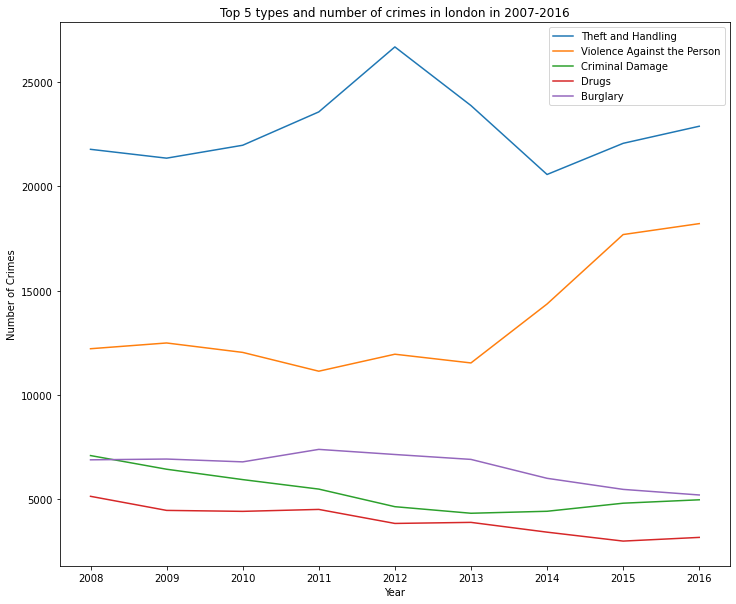

In [79]:
df_top5.plot() # memanggil plot line
plt.rcParams['figure.figsize'] = [12,10] #mengubah ukuran canvas plot line
plt.xlabel('Year') #menyeting label x
plt.ylabel('Number of Crimes') #menyeting label y
plt.title('Top 5 types and number of crimes in london in 2007-2016') #judul plot line
plt.show() #menampilkan 

*Keterangan dari LinePLot*

1. Menduduki tingkat pertama untuk jumlah kasus, untuk kejahatan besar *Theft and Handling* sudah sangat tinggi dimulai pada tahun 2008 diangka 21.773. Lalu mengamlami penurunan sedikit pada tahun 2009. Setelah tahun 2009 *Theft and Handling* mengalami peningkatan dari 2009 hinggi 2012. Tahun 2012 adalah puncak tertinggi. Lalu menglami penurunan signifikan pada tahun 2012 menuju 2014, dan ahkirnya mengalami peningkatan hingga tahun 2016


2. Menduduki tingkat kedua untuk jumlah kasus, untuk kejahatan besar *Violence Againts the Person* dimulai pada tahun 2008 diangka 12.216. Mengalami sedikit peningkatan di tahun 2009 lalu mengalami penurunan hingga tahun 2011. Mengalami peningkatan kembali dari 2011 - 2012 , akan tetapi tidak terlalu signifikan. Mengalami penurunan pada tahun 2013. Saat 2013, mengalami peningkatan yang sangat signifikan hingga 2016 dari ksiaran 11.535 hingga 18.212 kasus.


3. Menduduki tingkat ketiga untuk jumlah kasus, untuk kejahatan besar *Bulglary* dimulai pada tahun 2008 diangka 6.892 . Mengalami sedikit peningkatan di tahun 2009 lalu mengalami penurunan sedikit pada tahun 2010. Pada tahun 2011 mengalami penigkatan ke tahun 2011, dan mengalami penurunan hingga tahun 2016


4. Menduduki tingkat keempat untuk jumlah kasus, untuk kejahatan besar *Criminal Damage* dimulai pada tahun 2008 diangka 7096. Lalu mengalami penurunan dari 2008 - 2013.Lalu 2013 - 2016 mengalami kenaikan tetapi tidak terlalu signifikan


5. Menduduki tingkat kelima untuk jumlah kasus, untuk kejahatan besar *Drugs* dimulai pada tahun 2008 diangka 5.143 . Lalu mengalami penurunan tahun 2009-2010, dan naik turun di tahun 2011-2013. Dan turun drastis 2013-2016

### BarChart

#### Membuat BarChart Secara Vertikal

> Sekarang kita akan memvisualisasikan menggunakan BarChart

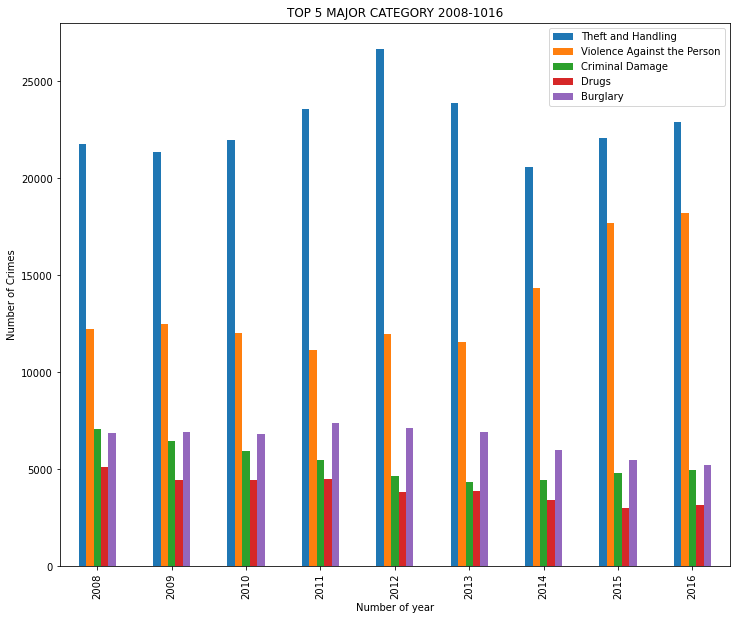

In [80]:
df_top5.plot(kind='bar') #jenis dari bar
plt.title('TOP 5 MAJOR CATEGORY 2008-1016') #judul
plt.ylabel('Number of Crimes') #ylabel
plt.xlabel('Number of year') #xlabel
plt.show() #tampilkan

#### Membuat Bar Chart Horizontal

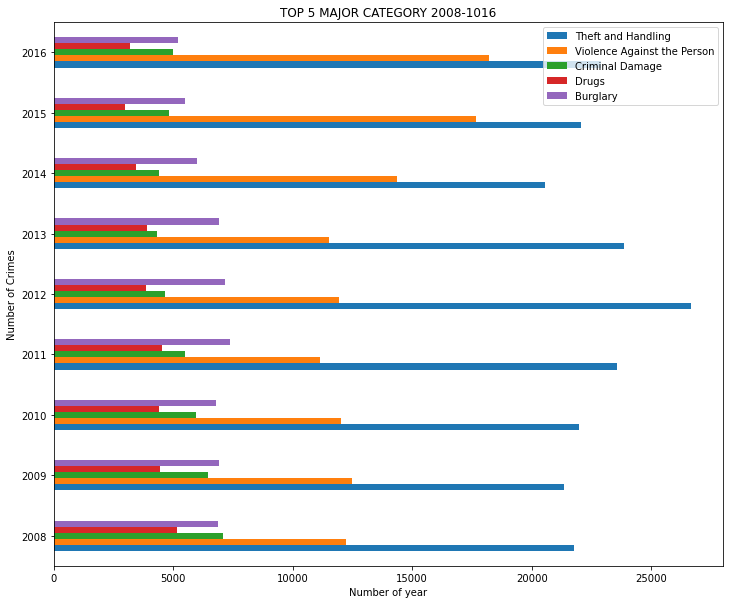

In [81]:
df_top5.plot(kind='barh') #barchart horizontal
plt.title('TOP 5 MAJOR CATEGORY 2008-1016') #judul chart
plt.ylabel('Number of Crimes') # nema label y
plt.xlabel('Number of year') #nama label x
plt.show() #menampilkan

*Keterangan dari BarChart*

1. Menduduki tingkat pertama untuk jumlah kasus, untuk kejahatan besar *Theft and Handling* sudah sangat tinggi dimulai pada tahun 2008 diangka 21.773. Lalu mengamlami penurunan sedikit pada tahun 2009. Setelah tahun 2009 *Theft and Handling* mengalami peningkatan dari 2009 hinggi 2012. Tahun 2012 adalah puncak tertinggi. Lalu menglami penurunan signifikan pada tahun 2012 menuju 2014, dan ahkirnya mengalami peningkatan hingga tahun 2016


2. Menduduki tingkat kedua untuk jumlah kasus, untuk kejahatan besar *Violence Againts the Person* dimulai pada tahun 2008 diangka 12.216. Mengalami sedikit peningkatan di tahun 2009 lalu mengalami penurunan hingga tahun 2011. Mengalami peningkatan kembali dari 2011 - 2012 , akan tetapi tidak terlalu signifikan. Mengalami penurunan pada tahun 2013. Saat 2013, mengalami peningkatan yang sangat signifikan hingga 2016 dari ksiaran 11.535 hingga 18.212 kasus.


3. Menduduki tingkat ketiga untuk jumlah kasus, untuk kejahatan besar *Bulglary* dimulai pada tahun 2008 diangka 6.892 . Mengalami sedikit peningkatan di tahun 2009 lalu mengalami penurunan sedikit pada tahun 2010. Pada tahun 2011 mengalami penigkatan ke tahun 2011, dan mengalami penurunan hingga tahun 2016


4. Menduduki tingkat keempat untuk jumlah kasus, untuk kejahatan besar *Criminal Damage* dimulai pada tahun 2008 diangka 7096. Lalu mengalami penurunan dari 2008 - 2013.Lalu 2013 - 2016 mengalami kenaikan tetapi tidak terlalu signifikan


5. Menduduki tingkat kelima untuk jumlah kasus, untuk kejahatan besar *Drugs* dimulai pada tahun 2008 diangka 5.143 . Lalu mengalami penurunan tahun 2009-2010, dan naik turun di tahun 2011-2013. Dan turun drastis 2013-2016

### Area Plot 

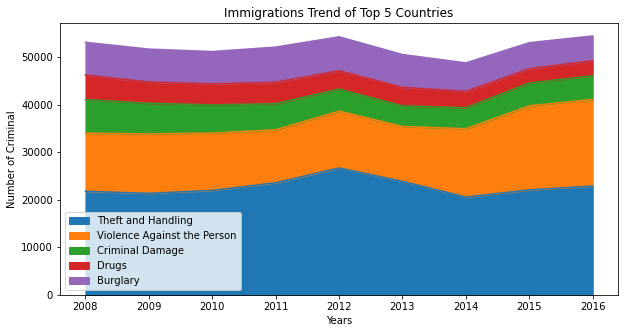

In [82]:
# area plot 
df_top5.plot(kind='area', figsize=(10,5)) #jenis area plot
plt.title("Immigrations Trend of Top 5 Countries") #judul
plt.ylabel('Number of Criminal') #y label
plt.xlabel('Years')# x label
plt.show() #menampilkan

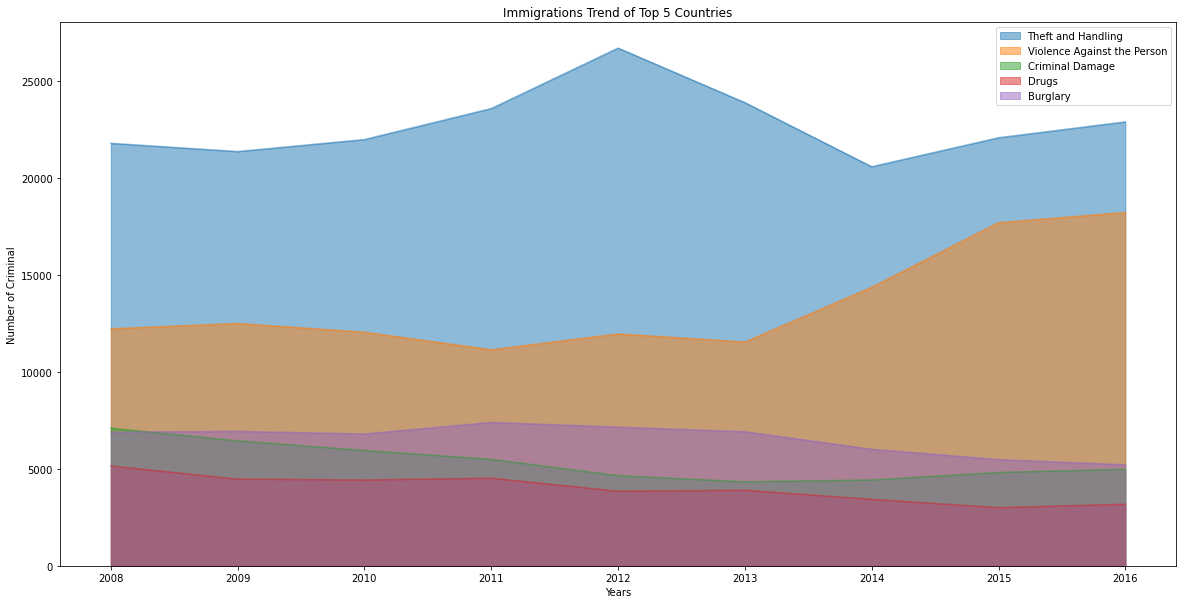

In [83]:
#area plot dengan artisan layer
df_top5.index = df_top5.index.map(int)

df_top5.plot(kind='area',
            stacked=False,
            figsize=(20,10)
            )

plt.title("Immigrations Trend of Top 5 Countries")
plt.ylabel('Number of Criminal')
plt.xlabel('Years')

plt.show()

*Keterangan dari Area Plot*

1. Menduduki tingkat pertama untuk jumlah kasus, untuk kejahatan besar *Theft and Handling* sudah sangat tinggi dimulai pada tahun 2008 diangka 21.773. Lalu mengamlami penurunan sedikit pada tahun 2009. Setelah tahun 2009 *Theft and Handling* mengalami peningkatan dari 2009 hinggi 2012. Tahun 2012 adalah puncak tertinggi. Lalu menglami penurunan signifikan pada tahun 2012 menuju 2014, dan ahkirnya mengalami peningkatan hingga tahun 2016


2. Menduduki tingkat kedua untuk jumlah kasus, untuk kejahatan besar *Violence Againts the Person* dimulai pada tahun 2008 diangka 12.216. Mengalami sedikit peningkatan di tahun 2009 lalu mengalami penurunan hingga tahun 2011. Mengalami peningkatan kembali dari 2011 - 2012 , akan tetapi tidak terlalu signifikan. Mengalami penurunan pada tahun 2013. Saat 2013, mengalami peningkatan yang sangat signifikan hingga 2016 dari ksiaran 11.535 hingga 18.212 kasus.


3. Menduduki tingkat ketiga untuk jumlah kasus, untuk kejahatan besar *Bulglary* dimulai pada tahun 2008 diangka 6.892 . Mengalami sedikit peningkatan di tahun 2009 lalu mengalami penurunan sedikit pada tahun 2010. Pada tahun 2011 mengalami penigkatan ke tahun 2011, dan mengalami penurunan hingga tahun 2016


4. Menduduki tingkat keempat untuk jumlah kasus, untuk kejahatan besar *Criminal Damage* dimulai pada tahun 2008 diangka 7096. Lalu mengalami penurunan dari 2008 - 2013.Lalu 2013 - 2016 mengalami kenaikan tetapi tidak terlalu signifikan


5. Menduduki tingkat kelima untuk jumlah kasus, untuk kejahatan besar *Drugs* dimulai pada tahun 2008 diangka 5.143 . Lalu mengalami penurunan tahun 2009-2010, dan naik turun di tahun 2011-2013. Dan turun drastis 2013-2016

### Word Clouds Major Category

> Sekarang kita akan menampilkan major_category dengan Word Clouds yang akan menunjukan seberapa sering kasus muncul

In [84]:
# kata yang ada pada kolom area
stopwords = list(df['major_category'])
stopwords

['Burglary',
 'Violence Against the Person',
 'Violence Against the Person',
 'Burglary',
 'Robbery',
 'Theft and Handling',
 'Violence Against the Person',
 'Robbery',
 'Criminal Damage',
 'Theft and Handling',
 'Theft and Handling',
 'Violence Against the Person',
 'Robbery',
 'Violence Against the Person',
 'Theft and Handling',
 'Violence Against the Person',
 'Theft and Handling',
 'Violence Against the Person',
 'Theft and Handling',
 'Drugs',
 'Violence Against the Person',
 'Theft and Handling',
 'Criminal Damage',
 'Drugs',
 'Theft and Handling',
 'Violence Against the Person',
 'Theft and Handling',
 'Violence Against the Person',
 'Violence Against the Person',
 'Violence Against the Person',
 'Burglary',
 'Criminal Damage',
 'Criminal Damage',
 'Violence Against the Person',
 'Violence Against the Person',
 'Theft and Handling',
 'Criminal Damage',
 'Criminal Damage',
 'Theft and Handling',
 'Drugs',
 'Fraud or Forgery',
 'Violence Against the Person',
 'Drugs',
 'Theft and

In [86]:
text = ' '.join(df['major_category'].astype(str).tolist()) #menggabungkan anatara " " dengan major_category dan mengubah tipedata menjadi string dan list

In [87]:
mC = WordCloud(width=800, height=800, background_color='white', 
               min_font_size=10).generate(text) #melakukan penyetingan text

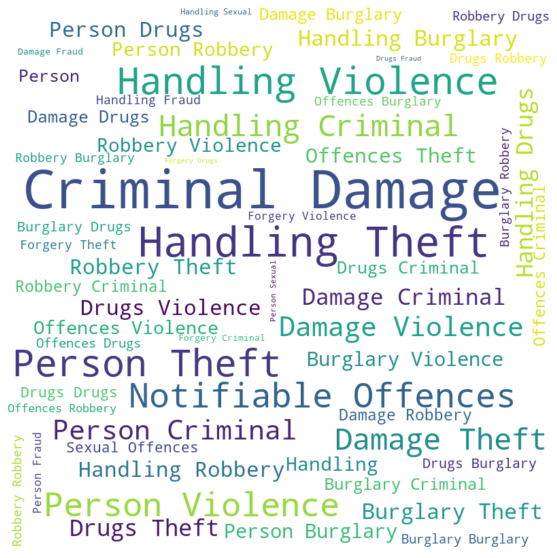

In [88]:
# wilayah yang sering muncul pada kolom area
fig=plt.figure(figsize=(10,10))
plt.imshow(mC, interpolation='bilinear')
plt.axis("off")
plt.show()

> Bisa kita lihat Criminal DAmage, Violence, Drugs, Theft , Burglary adalah kata kata yang sering munculk digambar, menandakan bahwa kasus kasus tersebut sering muncul/ terjadi

## Daerah mana sajakah yang mempunyai nilai 5 Kejahatan Besar tertingi pada tahun 2016?

> Sekarang mari kita lihat wilayah yang memiliki jumlah kasus terbanyak. mengambil berdasarkan tahun 2016, dan top 5 major_category  dan dikelompokan dengan area dan counted sebgai paramater letak dan jumlah angka kriminalnya

In [38]:
df_top5

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
2008,21773,12216,7096,5143,6892
2009,21349,12492,6441,4468,6929
2010,21968,12040,5944,4422,6794
2011,23566,11139,5489,4515,7392
2012,26681,11953,4646,3843,7147
2013,23870,11535,4331,3894,6912
2014,20567,14360,4426,3425,6006
2015,22060,17688,4813,2997,5475
2016,22879,18212,4976,3174,5207


In [89]:
#memfilter dan membuat data yang akan nantinya divisualisasikan dengan tahun 2016, major_category Theft and Handling
area_TaH = (df[(df['year'] == 2016)&(df['major_category'] == 'Theft and Handling')].groupby('area')['counted'].sum())
area_TaH

area
Barking and Dagenham       380
Barnet                     720
Bexley                     357
Brent                      689
Bromley                    557
Camden                     930
City of London               5
Croydon                    789
Ealing                     767
Enfield                    625
Greenwich                  600
Hackney                    890
Hammersmith and Fulham     807
Haringey                   839
Harrow                     369
Havering                   459
Hillingdon                 659
Hounslow                   600
Islington                  813
Kensington and Chelsea     830
Kingston upon Thames       260
Lambeth                   1037
Lewisham                   553
Merton                     426
Newham                    1184
Redbridge                  642
Richmond upon Thames       327
Southwark                 1028
Sutton                     277
Tower Hamlets              927
Waltham Forest             604
Wandsworth                 875
Wes

In [40]:
area_TaH.to_frame()
df_sorted_area_TaH = area_TaH.sort_values(ascending=False).head(5)
df_sorted_area_TaH

area
Westminster    2054
Newham         1184
Lambeth        1037
Southwark      1028
Camden          930
Name: counted, dtype: int64

In [41]:
#memfilter dan membuat data yang akan nantinya divisualisasikan dengan tahun 2016, major_category Violence Against the Person
area_violence = (df[(df['year'] == 2016)&(df['major_category'] == 'Violence Against the Person')].groupby('area')['counted'].sum())
area_violence

area
Barking and Dagenham      460
Barnet                    583
Bexley                    354
Brent                     687
Bromley                   486
Camden                    634
City of London              1
Croydon                   794
Ealing                    762
Enfield                   598
Greenwich                 671
Hackney                   722
Hammersmith and Fulham    470
Haringey                  776
Harrow                    306
Havering                  486
Hillingdon                636
Hounslow                  619
Islington                 516
Kensington and Chelsea    357
Kingston upon Thames      231
Lambeth                   856
Lewisham                  718
Merton                    326
Newham                    714
Redbridge                 496
Richmond upon Thames      233
Southwark                 732
Sutton                    315
Tower Hamlets             680
Waltham Forest            572
Wandsworth                528
Westminster               893
Name:

In [42]:
area_violence.to_frame()
df_sorted_area_violence = area_violence.sort_values(ascending=False).head(5)
df_sorted_area_violence

area
Westminster    893
Lambeth        856
Croydon        794
Haringey       776
Ealing         762
Name: counted, dtype: int64

In [43]:
#memfilter dan membuat data yang akan nantinya divisualisasikan dengan tahun 2016, major_category Criminal Damage
area_criminalDamage = (df[(df['year'] == 2016)&(df['major_category'] == 'Criminal Damage')].groupby('area')['counted'].sum())
area_criminalDamage

area
Barking and Dagenham      147
Barnet                    181
Bexley                    140
Brent                     180
Bromley                   152
Camden                    177
City of London              0
Croydon                   245
Ealing                    215
Enfield                   133
Greenwich                 197
Hackney                   140
Hammersmith and Fulham    153
Haringey                  154
Harrow                    104
Havering                  107
Hillingdon                179
Hounslow                  160
Islington                 145
Kensington and Chelsea     93
Kingston upon Thames       80
Lambeth                   196
Lewisham                  174
Merton                    106
Newham                    211
Redbridge                 108
Richmond upon Thames      102
Southwark                 214
Sutton                    104
Tower Hamlets             179
Waltham Forest            139
Wandsworth                153
Westminster               208
Name:

In [44]:
area_criminalDamage.to_frame()
df_sorted_area_criminalDamage = area_criminalDamage.sort_values(ascending=False).head(5)
df_sorted_area_criminalDamage

area
Croydon        245
Ealing         215
Southwark      214
Newham         211
Westminster    208
Name: counted, dtype: int64

In [45]:
#memfilter dan membuat data yang akan nantinya divisualisasikan dengan tahun 2016, major_category Drugs
area_drugs = (df[(df['year'] == 2016)&(df['major_category'] == 'Drugs')].groupby('area')['counted'].sum())
area_drugs

area
Barking and Dagenham       65
Barnet                     62
Bexley                     62
Brent                     145
Bromley                    59
Camden                    178
City of London              1
Croydon                    99
Ealing                     96
Enfield                    90
Greenwich                  77
Hackney                   128
Hammersmith and Fulham     89
Haringey                  131
Harrow                     37
Havering                   67
Hillingdon                101
Hounslow                   91
Islington                 160
Kensington and Chelsea    150
Kingston upon Thames       40
Lambeth                   255
Lewisham                   93
Merton                     21
Newham                    155
Redbridge                  75
Richmond upon Thames       16
Southwark                 149
Sutton                     31
Tower Hamlets             140
Waltham Forest             75
Wandsworth                 60
Westminster               176
Name:

In [46]:
area_drugs.to_frame()
df_sorted_area_drugs = area_drugs.sort_values(ascending=False).head(5)
df_sorted_area_drugs

area
Lambeth        255
Camden         178
Westminster    176
Islington      160
Newham         155
Name: counted, dtype: int64

In [47]:
#memfilter dan membuat data yang akan nantinya divisualisasikan dengan tahun 2016, major_category Burglary
area_burglary = (df[(df['year'] == 2016)&(df['major_category'] == 'Burglary')].groupby('area')['counted'].sum())
area_burglary

area
Barking and Dagenham      112
Barnet                    264
Bexley                     77
Brent                     213
Bromley                   159
Camden                    210
City of London              0
Croydon                   158
Ealing                    175
Enfield                   186
Greenwich                 152
Hackney                   197
Hammersmith and Fulham     99
Haringey                  173
Harrow                    118
Havering                  147
Hillingdon                176
Hounslow                  161
Islington                 191
Kensington and Chelsea    106
Kingston upon Thames       75
Lambeth                   240
Lewisham                  166
Merton                    112
Newham                    178
Redbridge                 144
Richmond upon Thames      104
Southwark                 237
Sutton                     87
Tower Hamlets             222
Waltham Forest            151
Wandsworth                214
Westminster               203
Name:

In [48]:
area_burglary.to_frame()
df_sorted_area_bulglary = area_burglary.sort_values(ascending=False).head(5)
df_sorted_area_bulglary

area
Barnet           264
Lambeth          240
Southwark        237
Tower Hamlets    222
Wandsworth       214
Name: counted, dtype: int64

### Pie Chart 

> Setelah kita melakuakn filterisasi data kejahatan major di ttahun 2016 dan beserta daerahnya . Marika kita lakukan visualisasi dalam pie Chart

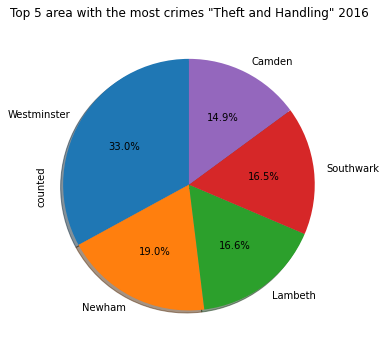

In [90]:
# pie chart = menggambarkan proporsi dari data
df_sorted_area_TaH.plot(kind='pie',figsize=(5,6),autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 5 area with the most crimes "Theft and Handling" 2016')
plt.axis('equal')
plt.show()

*Keterangan Pie Chart 1*

Dari diagram lingkaran diatas, dapat kita tarik kesimpulan bahwa kota yang memiliki tingkat kejahatan *Theft and handling* pada tahun 2016 adalah kota Westminster dengan persentase 33.0% (2054 kasus)

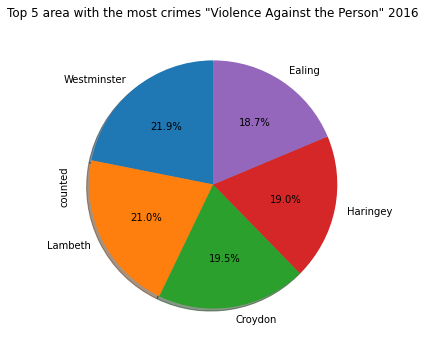

In [91]:
# pie chart = menggambarkan proporsi dari data
df_sorted_area_violence.plot(kind='pie',figsize=(5,6),autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 5 area with the most crimes "Violence Against the Person" 2016')
plt.axis('equal')
plt.show()

*Keterangan Pie Chart 2*

Dari diagram lingkaran diatas, dapat kita tarik kesimpulan bahwa kota yang memiliki tingkat kejahatan *Violence Against the Person* pada tahun 2016 adalah kota Westminster dengan persentase 21.9% (893 kasus)

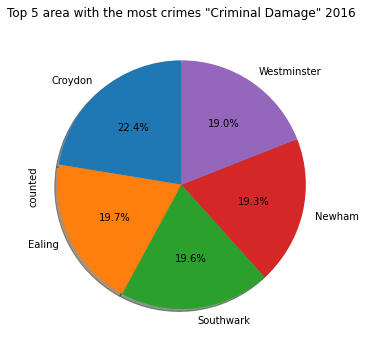

In [92]:
# pie chart = menggambarkan proporsi dari data
df_sorted_area_criminalDamage.plot(kind='pie',figsize=(5,6),autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 5 area with the most crimes "Criminal Damage" 2016')
plt.axis('equal')
plt.show()

*Keterangan Pie Chart 3*

Dari diagram lingkaran diatas, dapat kita tarik kesimpulan bahwa kota yang memiliki tingkat kejahatan *Criminal Damage* pada tahun 2016 adalah kota Croydon dengan persentase 22.4% (245 kasus)

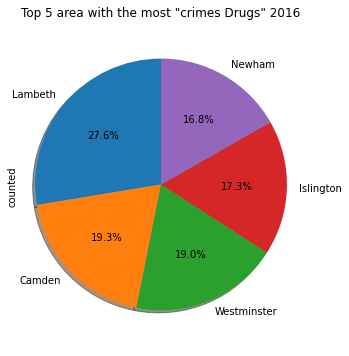

In [93]:
# pie chart = menggambarkan proporsi dari data
df_sorted_area_drugs.plot(kind='pie',figsize=(5,6),autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 5 area with the most "crimes Drugs" 2016')
plt.axis('equal')
plt.show()

*Keterangan Pie Chart 4*

Dari diagram lingkaran diatas, dapat kita tarik kesimpulan bahwa kota yang memiliki tingkat kejahatan *Drugs* pada tahun 2016 adalah kota Lambeth dengan persentase 27.6% (255 kasus)

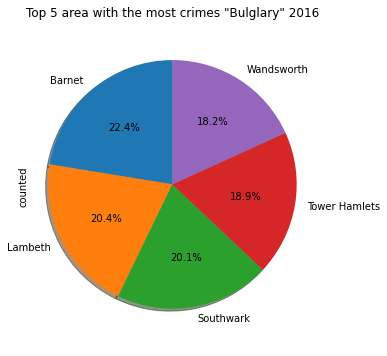

In [94]:
# pie chart = menggambarkan proporsi dari data
df_sorted_area_bulglary.plot(kind='pie',figsize=(5,6),autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 5 area with the most crimes "Bulglary" 2016')
plt.axis('equal')
plt.show()

*Keterangan Pie Chart 5*

Dari diagram lingkaran diatas, dapat kita tarik kesimpulan bahwa kota yang memiliki tingkat kejahatan *Burglary* pada tahun 2016 adalah kota Barnet dengan persentase 22.4% (264 kasus)

## Melihat Frekuensi munculnya kejahatan tiap tahunya

Sekarang mari kita lihat Frekuensi munculnya tingkat kejahatan besar dalam 2008-2016

### Histogram

Untuk membuat histogram, saya membuat variabel baru df_new_hist yang isinya adalah berapa banyak kejahatan itu muncul di setiap tahunnya

 Kita kunci untuk lokasinya dengn .loc()

In [54]:
df_new_hist = df_top5.loc[:,["Theft and Handling","Violence Against the Person","Criminal Damage","Drugs","Burglary"]]
df_new_hist

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
2008,21773,12216,7096,5143,6892
2009,21349,12492,6441,4468,6929
2010,21968,12040,5944,4422,6794
2011,23566,11139,5489,4515,7392
2012,26681,11953,4646,3843,7147
2013,23870,11535,4331,3894,6912
2014,20567,14360,4426,3425,6006
2015,22060,17688,4813,2997,5475
2016,22879,18212,4976,3174,5207


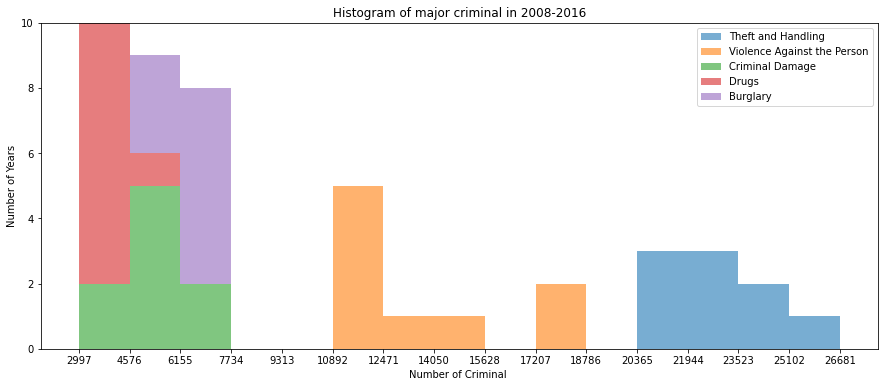

In [55]:
# membuat histogram jenis kejahatan yang terjadi di london pada tahun 2008-2016 berdasarkan major category
count, bin_edges = np.histogram(df_new_hist, 15)
df_new_hist.plot(kind='hist',
           figsize=(15, 6),
           bins=15,
           alpha=0.6,
           stacked=True,
           xticks=bin_edges
           )

plt.title('Histogram of major criminal in 2008-2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal ')

plt.show()

*Keterangan Histogram*

Dari data diatas, bisa kita lihat kejahatan Theft and Handling ini terjadi bebarapa kali dengan tingkat yang sangat tinggi tiap tahunnya dibanding dengan kejahatan lainnya. Theft and Handling menyentuh pada angaka 23523

### Box Plot

In [56]:
df_top5.describe()

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,22745.888889,13515.000000,5351.333333,3986.777778,6528.222222
std,1808.312365,2671.725519,963.518033,709.048972,771.969847
min,20567.000000,11139.000000,4331.000000,2997.000000,5207.000000
25%,21773.000000,11953.000000,4646.000000,3425.000000,6006.000000
50%,22060.000000,12216.000000,4976.000000,3894.000000,6892.000000
75%,23566.000000,14360.000000,5944.000000,4468.000000,6929.000000
max,26681.000000,18212.000000,7096.000000,5143.000000,7392.000000


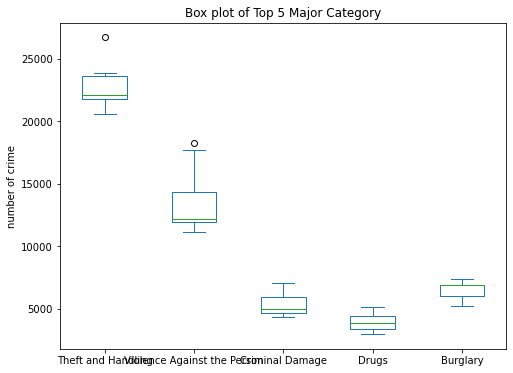

In [57]:
df_top5.plot(kind='box', figsize=(8,6))
plt.title('Box plot of Top 5 Major Category')
plt.ylabel('number of crime')
plt.show()


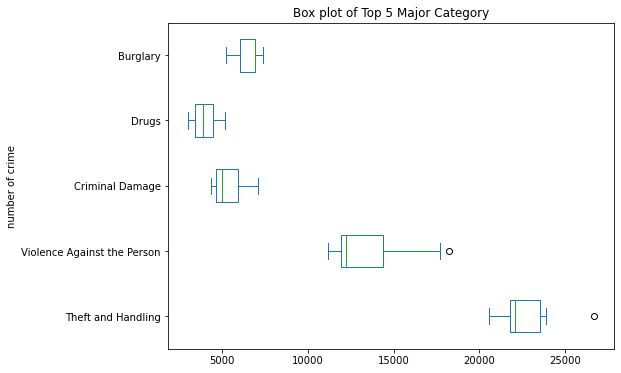

In [58]:
df_top5.plot(kind='box', figsize=(8,6), vert=False)
plt.title('Box plot of Top 5 Major Category')
plt.ylabel('number of crime')
plt.show()

###  Scatter

In [59]:
scatter_chart = df_new_hist.copy()

In [60]:
scatter_chart

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
2008,21773,12216,7096,5143,6892
2009,21349,12492,6441,4468,6929
2010,21968,12040,5944,4422,6794
2011,23566,11139,5489,4515,7392
2012,26681,11953,4646,3843,7147
2013,23870,11535,4331,3894,6912
2014,20567,14360,4426,3425,6006
2015,22060,17688,4813,2997,5475
2016,22879,18212,4976,3174,5207


In [61]:
scater_plot = scatter_chart.reset_index()
scater_plot

,index,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
0,2008,21773,12216,7096,5143,6892
1,2009,21349,12492,6441,4468,6929
2,2010,21968,12040,5944,4422,6794
3,2011,23566,11139,5489,4515,7392
4,2012,26681,11953,4646,3843,7147
5,2013,23870,11535,4331,3894,6912
6,2014,20567,14360,4426,3425,6006
7,2015,22060,17688,4813,2997,5475
8,2016,22879,18212,4976,3174,5207


In [62]:
scater_plot = scater_plot.rename(columns={'index':'year'})
scater_plot

,year,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
0,2008,21773,12216,7096,5143,6892
1,2009,21349,12492,6441,4468,6929
2,2010,21968,12040,5944,4422,6794
3,2011,23566,11139,5489,4515,7392
4,2012,26681,11953,4646,3843,7147
5,2013,23870,11535,4331,3894,6912
6,2014,20567,14360,4426,3425,6006
7,2015,22060,17688,4813,2997,5475
8,2016,22879,18212,4976,3174,5207


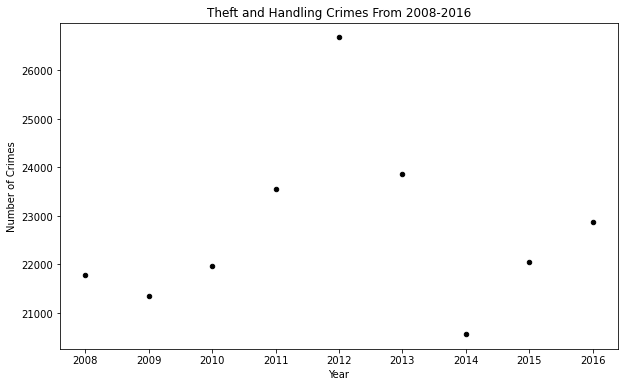

In [63]:
#membuat scatter
scater_plot.plot(kind='scatter', x='year', y='Theft and Handling', figsize=(10,6),color='black')
plt.title('Theft and Handling Crimes From 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

*keterangan*

Kita melihat betapa peningkatan yang sangat drasti pada tahun 2009-2012, dan ppenurunan drastis 2012-2014, akan tetapi angka itu meningkat lagi hingga tahun 2016

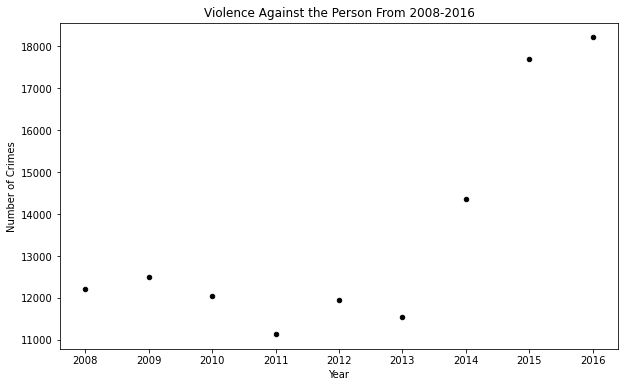

In [64]:
#membuat scatter
scater_plot.plot(kind='scatter', x='year', y='Violence Against the Person', figsize=(10,6),color='black')
plt.title('Violence Against the Person From 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

*keterangan*

Kita melihat betapa peningkatan yang sangat drasti pada tahun 2013-2016

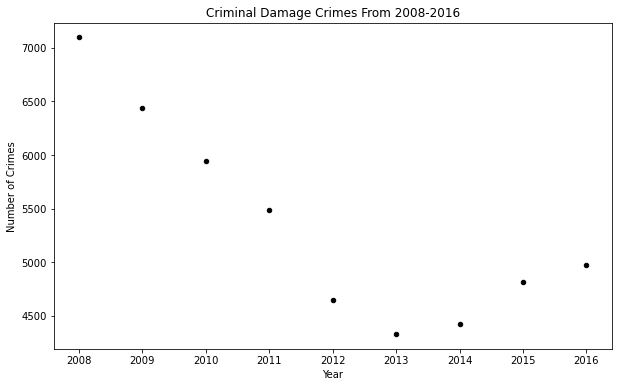

In [65]:
#membuat scatter
scater_plot.plot(kind='scatter', x='year', y='Criminal Damage', figsize=(10,6),color='black')
plt.title('Criminal Damage Crimes From 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

*keterangan*

Kita melihat betapa penurunan drastis pada whun 2008-2012

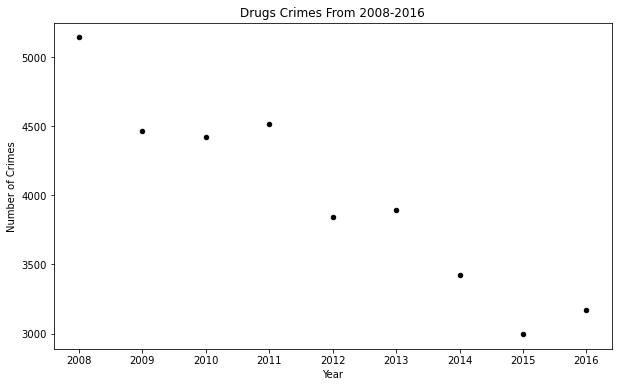

In [66]:
#membuat scatter
scater_plot.plot(kind='scatter', x='year', y='Drugs', figsize=(10,6),color='black')
plt.title('Drugs Crimes From 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

*keterangan*

Kita melihat Drugs mengalami penurunan yang bisa dibilang konsiten dibanding dengan kenaikannya

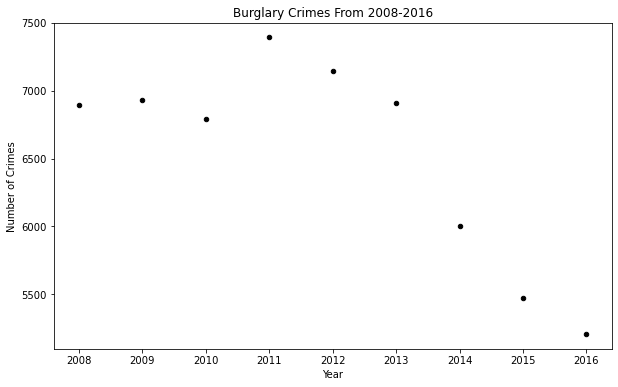

In [96]:
#membuat scatter
scater_plot.plot(kind='scatter', x='year', y='Burglary', figsize=(10,6),color='black')
plt.title('Burglary Crimes From 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

*keterangan*

Kita melihat Bulglary , hanya mengalami peningkatan pada tahun 2010, dan mengalami penurnan yang baik pada tahun 2011

In [68]:
TaH = (scater_plot['Theft and Handling']-scater_plot['Theft and Handling'].min()) / (scater_plot['Theft and Handling'].max() - scater_plot['Theft and Handling'].min())

vA = (scater_plot['Violence Against the Person']-scater_plot['Violence Against the Person'].min()) / (scater_plot['Violence Against the Person'].max() - scater_plot['Violence Against the Person'].min())

cd = (scater_plot['Criminal Damage']-scater_plot['Criminal Damage'].min()) / (scater_plot['Criminal Damage'].max() - scater_plot['Criminal Damage'].min())

dr = (scater_plot['Drugs']-scater_plot['Drugs'].min()) / (scater_plot['Drugs'].max() - scater_plot['Drugs'].min())

bG = (scater_plot['Burglary']-scater_plot['Burglary'].min()) / (scater_plot['Burglary'].max() - scater_plot['Burglary'].min())

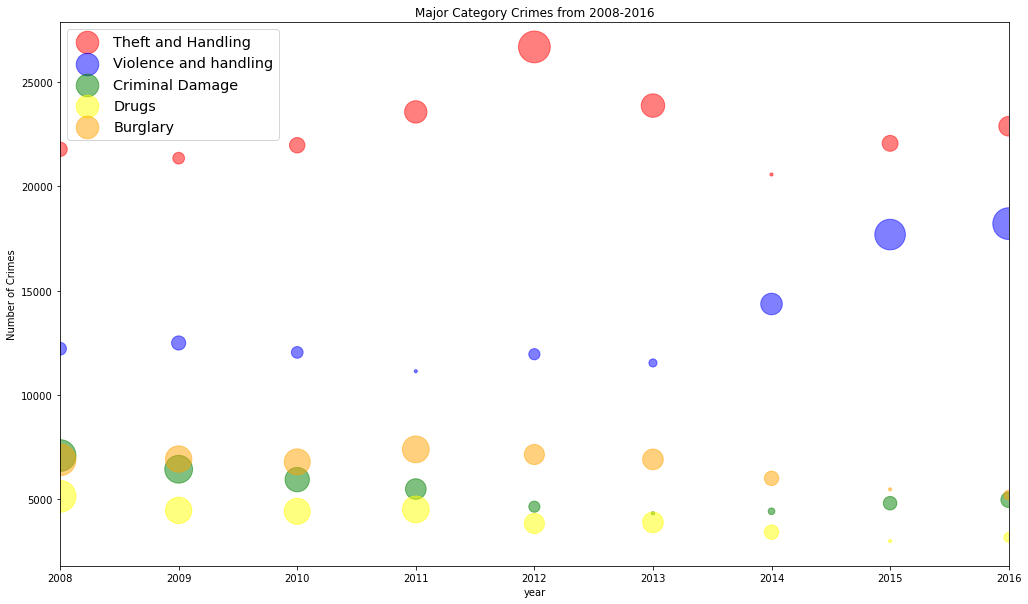

In [97]:
x0 =  scater_plot.plot(kind='scatter', x='year', y='Theft and Handling', figsize=(17, 10), alpha=0.5, color="red", s=TaH* 1000 +10, xlim=(2008,2016))

x1 =  scater_plot.plot(kind='scatter', x='year', y='Violence Against the Person', alpha=0.5, color="blue", s=vA * 1000 +10, ax = x0)

x2 =  scater_plot.plot(kind='scatter', x='year', y='Criminal Damage', alpha=0.5, color="green", s=cd * 1000 +10, ax = x0)

x3 =  scater_plot.plot(kind='scatter', x='year', y='Drugs', alpha=0.5, color="yellow", s=dr * 1000 +10, ax = x0)

x4 =  scater_plot.plot(kind='scatter', x='year', y='Burglary', alpha=0.5, color="orange", s=dr * 1000 +10, ax = x0)


x0.set_ylabel('Number of Crimes')
x0.set_title('Major Category Crimes from 2008-2016')
x0.legend(['Theft and Handling','Violence and handling', 'Criminal Damage','Drugs','Burglary'], 
loc='upper left', fontsize='x-large')

*Keterangan Scatter*

Bisa kita lihat disini Theft and handling mempunyai frekuensi tertinggi pada tahun 2012 dan meningkat secara dratis serta angka kriminalnya paling besar dari lainnya.

Di urutan kedua ada Violence and handling mengalami penurunan diawal lalu mengalami peningkatan yang sangat drastis pada tahun 2013-2016

Untuk 3 jenis lainnya, menglami kenaikan dan penurunan yang bisa dibilang tidak terlalu melunjak

## Daerah Yang harus ditangani

### Folium 

In [98]:
#London Lat and Lon
latitude= 51.5085300 #garis lintang
longitude= -0.1257400 #garis bujur

In [99]:
london = folium.Map(location=[latitude,longitude],zoom_start=12)
london

In [100]:
# Mengganti Tipe Peta
london1 = folium.Map(location=[51.5085300,-0.1257400],zoom_start=11,tiles='Stamen Toner')
london1

In [101]:
# Menampilkan Area Theft and handling Westminster
westminster = folium.Map(location=[51.494720, -0.135278],zoom_start=12,tiles='Stamen Terrain')
westminster

In [102]:
# Menampilkan Area Crodyon
Crodyon = folium.Map(location=[51.376495, -0.100594],zoom_start=14,tiles='Stamen Terrain')
Crodyon

In [103]:
# Menampilkan Area Lambeth
Lambeth = folium.Map(location=[51.49635, -0.11152],zoom_start=15,tiles='Stamen Terrain')
Lambeth

In [104]:
# Menampilkan Area barnet
barnet = folium.Map(location=[51.625150, -0.152936],zoom_start=13,tiles='Stamen Terrain')
barnet

# Kesimpulan 

Berdasarkan data dari *London Crime Data 2008-2016*, terdapat 33 daerah, 9 kategori kejahatan besar *(major_category)*, dan 32 kejahatan kecil *(minor_category)*.

Untuk hasil dari analisa yang saya dapatkan:
1. Untuk 5 kejahatan terbesar dalah kategori *major_category* sepanjang 2008-2016 diantaranya :
   1. Theft and Handling dengan jumlah kasus 307992 kasus
   2. Violence Against the Person dengan jumlah kasus    247061 kasus
   3. Criminal Damage dengan jumlah kasus                159997 kasus
   4. Drugs dengan jumlah kasus                      92169 kasus
   5. Burglary dengan jumlah kasus                      81064 kasus
   
   
2. Daerah dengan angka kriminalitas kejahatan besar beberapa jenis tertinggi tahun 2016 :
    1. Theft and handling 
          1. *Westminster* jumlah kasus sebesar 2054 kasus kriminal (33.0 %)
          2. *Newham*      jumlah kasus sebesar 1184 kasus kriminal (19.0 %)
          3. *Lambeth*     jumlah kasus sebesar 1037 kasus kriminal (16.6 %)
          4. *Southwark*   jumlah kasus sebesar 1028 kasus kriminal (16.5 %)
          5. *Camden*      jumlah kasus sebesar 930 kasus kriminal  (14.9 %)
      
    2. Violence Against the Person
        1. *Westminster*     jumlah kasus sebesar 893 kasus kriminal (21.9 %)
        2. *Lambeth*        jumlah kasus sebesar 856 kasus kriminal (21.0 %)
        3. *Croydon*        jumlah kasus sebesar 794 kasus kriminal (19.5 %)
        4. *Haringey*       jumlah kasus sebesar 776 kasus kriminal (19.0 %)
        5. *Ealing*         jumlah kasus sebesar 762 kasus kriminal (18.7 %)
        
    3. Criminal Damage
        1. *Croydon*        jumlah kasus sebesar 245 kasus kriminal (22.4 %)
        2. *Ealing*         jumlah kasus sebesar 215 kasus kriminal (19.7 %)
        3. *Southwark*      jumlah kasus sebesar 214 kasus kriminal (19.6 %)
        4. *Newham*         jumlah kasus sebesar 211 kasus kriminal (19.3 %)
        5. *Westminster*    jumlah kasus sebesar 208 kasus kriminal (19.0 %)
        
    4. Drugs
        1. Lambeth        jumlah kasus sebesar 255 kasus kriminal (27.6 %)
        2. Camden         jumlah kasus sebesar 178 kasus kriminal (19.3 %)
        3. Westminster    jumlah kasus sebesar 176 kasus kriminal (19.0 %)
        4. Islington      jumlah kasus sebesar 160 kasus kriminal (17.3 %)
        5. Newham         jumlah kasus sebesar 155 kasus kriminal (16.8 %)
    5. Bulglary
       1. Barnet           jumlah kasus sebesar 264 kasus kriminal (22.4 %)
       2. Lambeth          jumlah kasus sebesar 240 kasus kriminal (20.4 %)
       3. Southwark        jumlah kasus sebesar 237 kasus kriminal (20.1 %)
       4. Tower Hamlets    jumlah kasus sebesar 222 kasus kriminal (18.9 %)
       5. Wandsworth       jumlah kasus sebesar 214 kasus kriminal (18.2 %)
       
3. Tingkat Frekuensi kejahatan yang sering muncul adalah Theft and Handling yaitu pada tahun 2012 yang bisa dibilang sangat tinggi dibandingkan dengan kategori kejahatan besar lainnya


4. Dari semua hasil kesimpulan diatas, maka bisa diambil keputusan untuk daerah yang perlu ditekan angka kriminalitasnya pada tahun berikutnya antara lain :
   1. Westminster dengan kasus Theft and Handling dan Voilence the person
   2. Croydon dengan kasus Criminal Damage
   3. Lambeth dengan kasus Drugs
   4. Barnet dengan kasus Bulglary

SEKIAN LAPORAN DARI SAYA TERIMAKASIH